In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = fetch_california_housing()

In [4]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25


In [6]:
dataset.columns = df.feature_names

In [7]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df.target.shape

(20640,)

In [9]:
dataset["Price"] = df.target

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[: , -1]

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()

In [15]:
mse = cross_val_score(lin_reg , x , y , scoring = "neg_mean_squared_error" , cv = 5)

In [16]:
mean_msp = np.mean(mse)
print(mean_msp)

-0.5582901717686564


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [19]:
ridge = Ridge()
parameters = {'alpha' :[1e-15 , 1e-10 ,1e-8 , 1e-3 , 1e-2 , 1,5,10,20,35,40,45,50,55,100]}

In [20]:
ridge_regression = GridSearchCV(ridge , parameters , scoring = 'neg_mean_squared_error' , cv= 5)

In [22]:
ridge_regression.fit(x , y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [24]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 55}
-0.5579444917053021


In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lass0 = Lasso()
parameters = {'alpha' :[1e-15 , 1e-10 ,1e-8 , 1e-3 , 1e-2 , 1,5,10,20,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(ridge , parameters , scoring = 'neg_mean_squared_error' , cv= 5)

lasso_regression.fit(x, y)
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 55}
-0.5579444917053021


In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 0)

In [30]:
prediction_lasso = lasso_regression.predict(x_test)
prediction_ridge = ridge_regression.predict(x_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11296\2904685435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<AxesSubplot: xlabel='Price', ylabel='Density'>

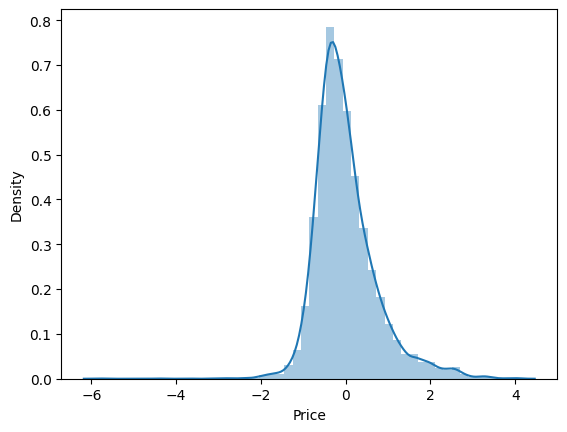

In [32]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11296\1693200975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<AxesSubplot: xlabel='Price', ylabel='Density'>

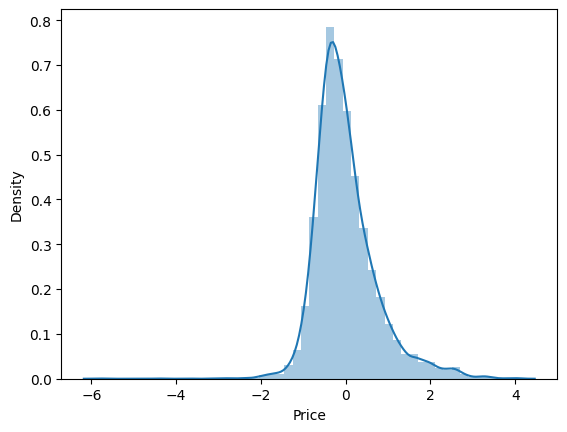

In [33]:
sns.distplot(y_test-prediction_ridge)